## Dataset

In [1]:
PATH = "../fruit_disease_dataset/data"

## Libraries

In [2]:
# Importing needed modules
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

2023-11-01 03:37:17.944849: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 03:37:18.011234: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 03:37:18.011275: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 03:37:18.011312: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 03:37:18.027596: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 03:37:18.028465: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Data Preprocessing
[Documentation](https://keras.io/api/data_loading/image/)

### Training Image Preprocessing

In [3]:
training_dataset = tensorflow.keras.utils.image_dataset_from_directory(
    PATH+"/train",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 5460 files belonging to 11 classes.


### Eval Image Preprocessing

In [4]:
eval_dataset = tensorflow.keras.utils.image_dataset_from_directory(
    PATH+"/eval",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 2388 files belonging to 11 classes.


## Building Model

In [5]:
# Convolutional Neural Network Model
cnn = tensorflow.keras.models.Sequential()

### Building Convolution Layer

In [6]:
# First Convolution Layer
cnn.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(64,64,3)))
cnn.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
# First Pool Layer
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [7]:
# Second Convolution Layer
cnn.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
cnn.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
# Second Pool Layer
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [8]:
# cnn.add(tensorflow.keras.layers.Dropout(0.5)) # Make sure that overfitting is avoided

In [9]:
cnn.add(tensorflow.keras.layers.Flatten()) # Flatenning the Convolution Layer

In [10]:
cnn.add(tensorflow.keras.layers.Dense(units=512, activation="relu"))
cnn.add(tensorflow.keras.layers.Dense(units=256, activation="relu"))
cnn.add(tensorflow.keras.layers.Dropout(0.5)) # Make sure that overfitting is avoided

In [11]:
# this will the output layer
cnn.add(tensorflow.keras.layers.Dense(units=11, activation="softmax")) # units = 11 because we have 11 classes

## Compiling Phases

In [12]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
training_history = cnn.fit(x=training_dataset, validation_data=eval_dataset, epochs=32)

Epoch 1/32
171/171 [==============================] - 171s 979ms/step - loss: 2.7838 - accuracy: 0.3597 - val_loss: 1.6656 - val_accuracy: 0.4234
Epoch 2/32
171/171 [==============================] - 121s 708ms/step - loss: 1.2103 - accuracy: 0.5716 - val_loss: 1.7502 - val_accuracy: 0.5063
Epoch 3/32
171/171 [==============================] - 138s 809ms/step - loss: 0.7375 - accuracy: 0.7531 - val_loss: 2.2860 - val_accuracy: 0.5075
Epoch 4/32
171/171 [==============================] - 141s 823ms/step - loss: 0.4556 - accuracy: 0.8608 - val_loss: 2.6211 - val_accuracy: 0.5046
Epoch 5/32
171/171 [==============================] - 140s 817ms/step - loss: 0.2446 - accuracy: 0.9205 - val_loss: 3.4812 - val_accuracy: 0.4992
Epoch 6/32
171/171 [==============================] - 136s 794ms/step - loss: 0.1923 - accuracy: 0.9364 - val_loss: 3.8515 - val_accuracy: 0.5285
Epoch 7/32
171/171 [==============================] - 134s 786ms/step - loss: 0.1994 - accuracy: 0.9412 - val_loss: 3.9935 -

## Saving Model

In [14]:
cnn.save("fruit_disease_detection_model.h5");

/home/aadi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
training_history.history

{'loss': [2.7838029861450195,
  1.2103108167648315,
  0.7374534606933594,
  0.4555976986885071,
  0.24463386833667755,
  0.1922510415315628,
  0.199446901679039,
  0.13855156302452087,
  0.12116768211126328,
  0.13819530606269836,
  0.16877220571041107,
  0.09608935564756393,
  0.14245809614658356,
  0.10826382786035538,
  0.05455777049064636,
  0.06278206408023834,
  0.10344570130109787,
  0.1269836723804474,
  0.04166238754987717,
  0.046877454966306686,
  0.12750066816806793,
  0.04069190099835396,
  0.04081304371356964,
  0.10063882172107697,
  0.039981480687856674,
  0.009771868586540222,
  0.18713192641735077,
  0.05263002961874008,
  0.05942609906196594,
  0.05038149282336235,
  0.02187429368495941,
  0.07617790997028351],
 'accuracy': [0.35970696806907654,
  0.5716117024421692,
  0.7531135678291321,
  0.860805869102478,
  0.9205127954483032,
  0.9364469051361084,
  0.9412087798118591,
  0.9560439586639404,
  0.9639194011688232,
  0.9652014374732971,
  0.9564102292060852,
  0.97

In [16]:
# Recording Data
import json

with open("fruit_disease_detection_history.json", "w") as  f:
    json.dump(training_history.history, f)

In [17]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Calculating Accuracy of Model Achieved on Evaluation Set

In [18]:
print(f"Validation set Accuracy: {training_history.history['val_accuracy'][-1]*100} %")

Validation set Accuracy: 48.61809015274048 %


## Accuracy Visualization

### Training Visualization

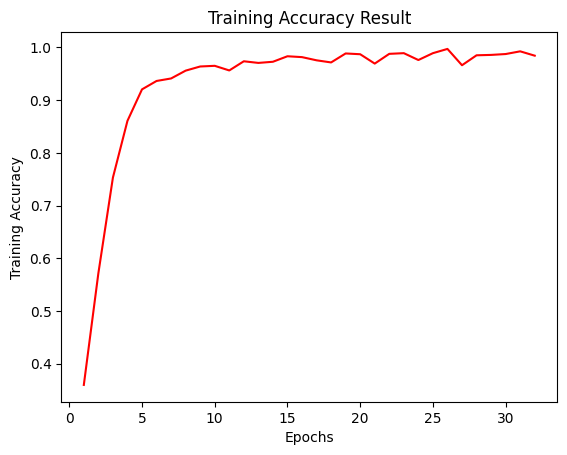

In [19]:
epochs = [i for i in range(1, 33)]
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy Result")
plt.show()

### Evaluation Accuracy

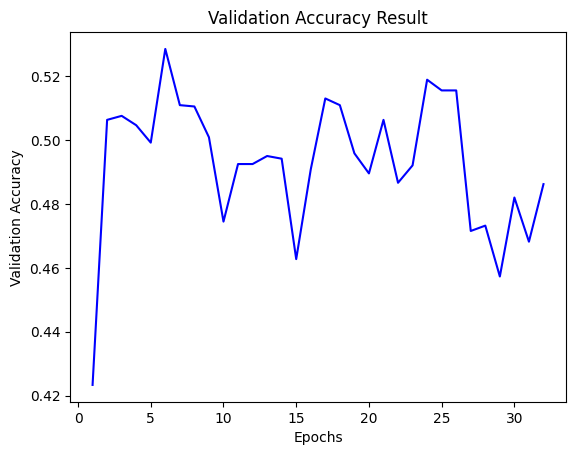

In [20]:
plt.plot(epochs, training_history.history['val_accuracy'], color='blue')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Result")
plt.show()